### Machine Learning Coursework

### Student ID: 00019257

### Task 1. Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries are imported")

Libraries are imported


In [98]:
# # Load the dataset
# # My dataset uses semicolon as delimiter and requires specific encoding "cp1252"
df = pd.read_csv('data/apartments_for_rent_classified_10K.csv', delimiter=';', encoding='cp1252')

print("Dataset is loaded")
print(f"Dataset shape: {df.shape}")

Dataset is loaded
Dataset shape: (10000, 22)


In [99]:
# first 5 rows will be shown
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


### Task 2: Exploratory Data Analysis

In [100]:
# dataset information
print("Dataset Information:")
df.info()

print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null  

In [108]:
# statistical measures for numerical features
numerical_cols = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
existing_num_cols = [col for col in numerical_cols if col in df.columns]

print("\nDetailed Statistics for Key Features:")

for col in existing_num_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Variance: {df[col].var():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")


Detailed Statistics for Key Features:

PRICE:
  Mean: 1486.28
  Median: 1270.00
  Std Dev: 1076.51
  Variance: 1158869.40
  Min: 200.00
  Max: 52500.00

SQUARE_FEET:
  Mean: 945.81
  Median: 802.00
  Std Dev: 655.76
  Variance: 430015.58
  Min: 101.00
  Max: 40000.00

BATHROOMS:
  Mean: 1.38
  Median: 1.00
  Std Dev: 0.62
  Variance: 0.38
  Min: 1.00
  Max: 8.50

BEDROOMS:
  Mean: 1.74
  Median: 2.00
  Std Dev: 0.94
  Variance: 0.89
  Min: 0.00
  Max: 9.00

LATITUDE:
  Mean: 37.70
  Median: 38.81
  Std Dev: 5.50
  Variance: 30.20
  Min: 21.32
  Max: 61.59

LONGITUDE:
  Mean: -94.65
  Median: -93.65
  Std Dev: 15.76
  Variance: 248.37
  Min: -158.02
  Max: -70.19


In [109]:
# statistical summary using Describe method. This shows the summary in table format
print("Statistical summary of numerical features:")
df.describe()

Statistical summary of numerical features:


,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### Correlation Matrix

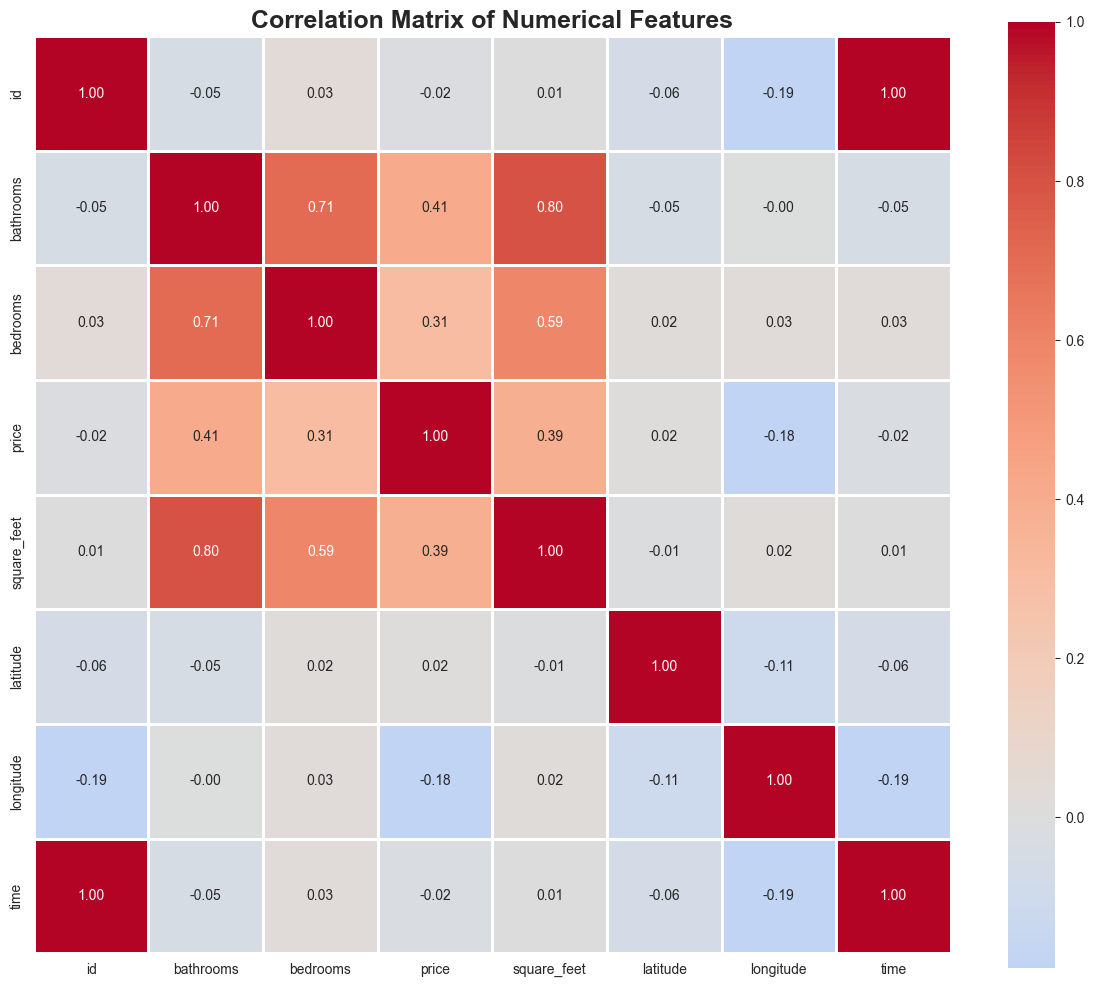


Correlation with Price (Target Variable):
bathrooms           :  0.4117
square_feet         :  0.3908
bedrooms            :  0.3065
latitude            :  0.0151
id                  : -0.0216
time                : -0.0223
longitude           : -0.1843


In [120]:
# Correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with price feature (target variable)
print("\nCorrelation with Price (Target Variable):")

price_corr = correlation_matrix['price'].sort_values(ascending=False)
for feature, corr_value in price_corr.items():
    if feature != 'price':
        print(f"{feature:20s}: {corr_value:7.4f}")

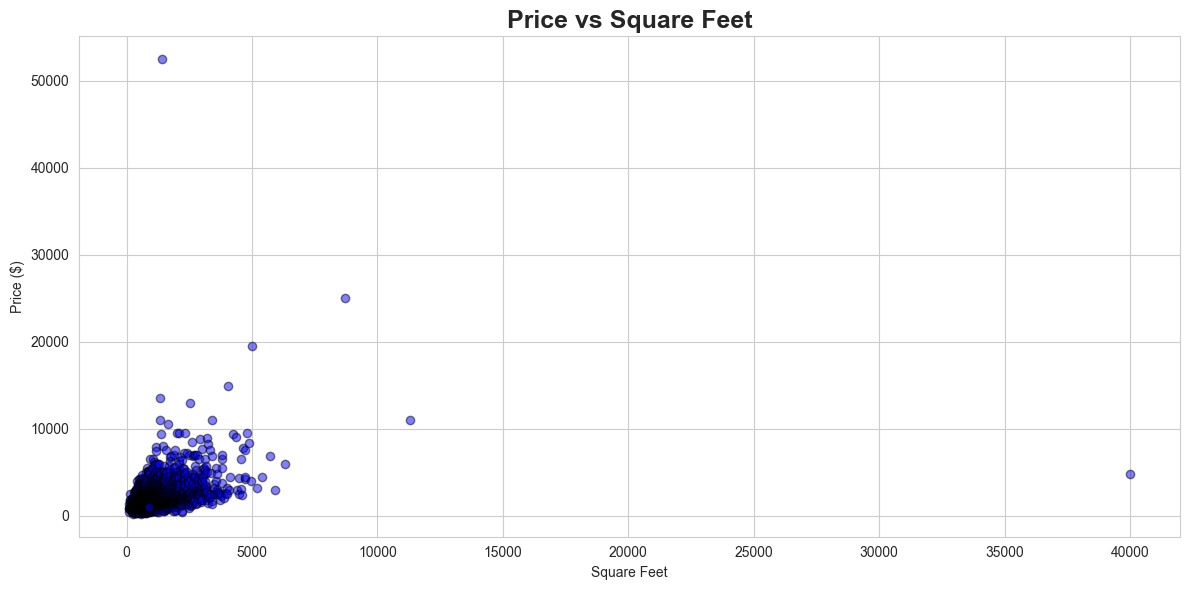

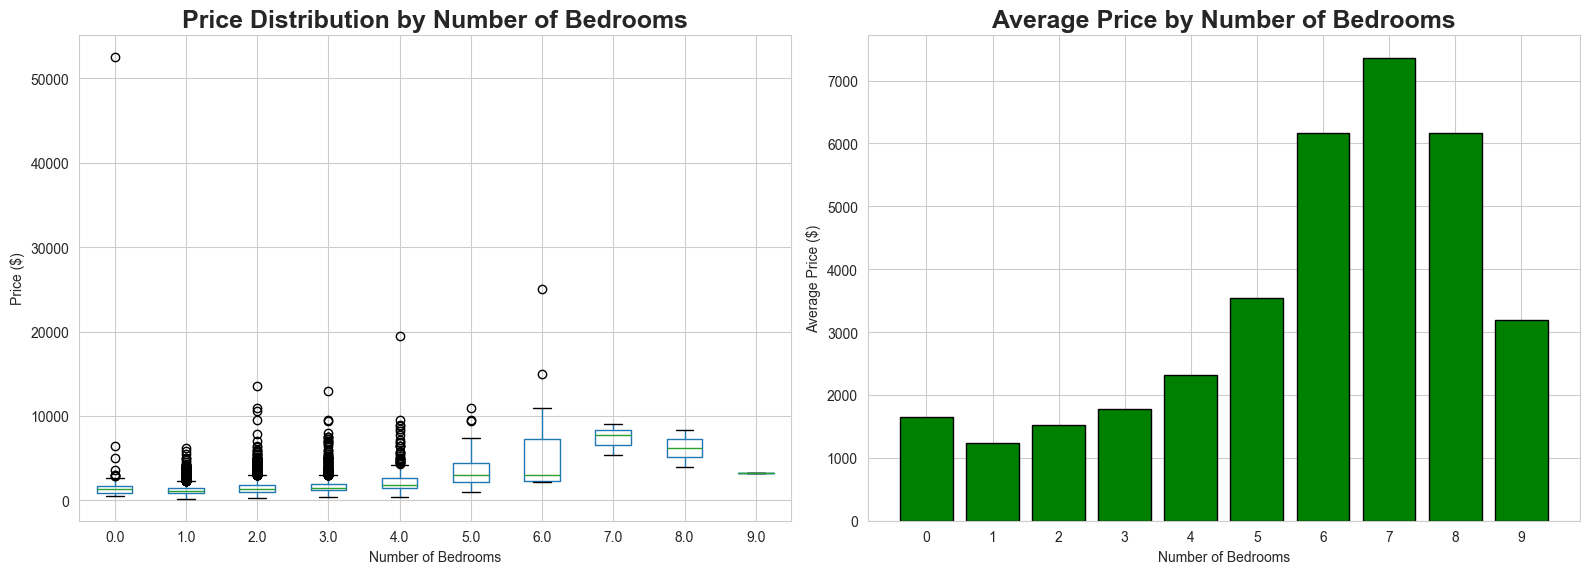

In [125]:
# Price vs Square Feet scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['square_feet'], df['price'], alpha=0.5, c='blue', edgecolors="black")
plt.title('Price vs Square Feet', fontsize=18, fontweight='bold')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Price by number of bedrooms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df.boxplot(column='price', by='bedrooms', ax=axes[0])
axes[0].set_title('Price Distribution by Number of Bedrooms', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Price ($)')
axes[0].get_figure().suptitle('')

# Average price by number of bedrooms
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean().sort_index()
axes[1].bar(avg_price_bedrooms.index, avg_price_bedrooms.values, color='green', edgecolor='black')
axes[1].set_title('Average Price by Number of Bedrooms', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Average Price ($)')
axes[1].set_xticks(avg_price_bedrooms.index)

plt.tight_layout()
plt.show()

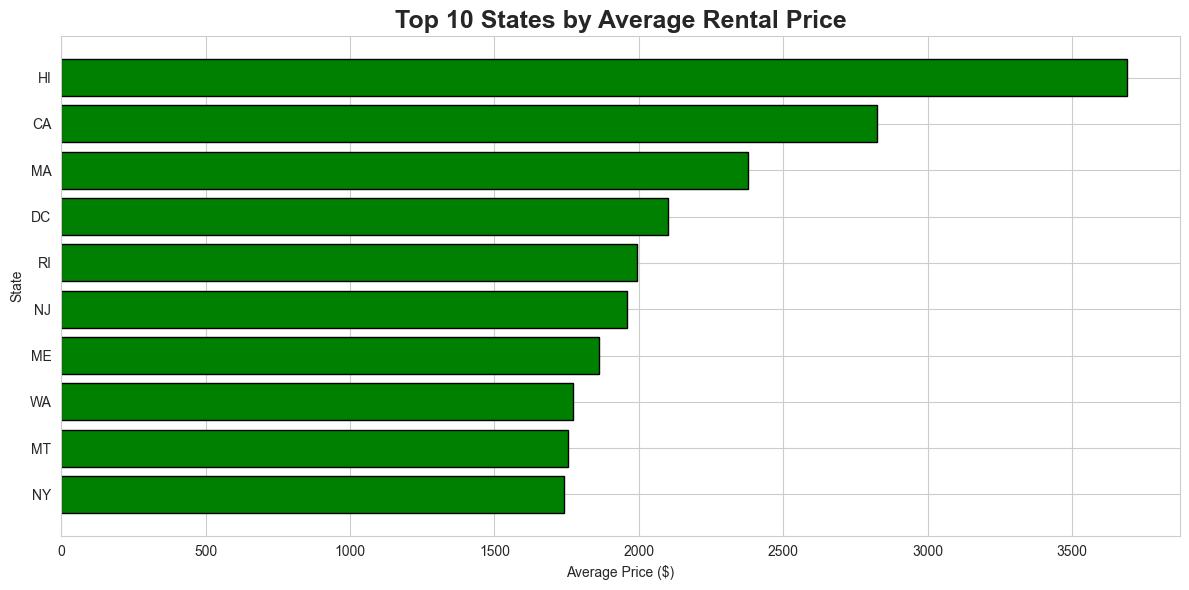


Top 10 States by Average Rental Price:
 1. HI    - $3,689.08
 2. CA    - $2,825.55
 3. MA    - $2,378.95
 4. DC    - $2,102.19
 5. RI    - $1,994.00
 6. NJ    - $1,960.23
 7. ME    - $1,862.50
 8. WA    - $1,773.77
 9. MT    - $1,755.71
10. NY    - $1,739.18


In [131]:
# Top 10 states by average rental price
top_states = df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_states.index, top_states.values, color='green', edgecolor='black')
plt.title('Top 10 States by Average Rental Price', fontsize=18, fontweight='bold')
plt.xlabel('Average Price ($)')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 States by Average Rental Price:")
for i, (state, price) in enumerate(top_states.items(), 1):
    print(f"{i:2d}. {state:5s} - ${price:,.2f}")

### Task 3: Data preparation

In [135]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found")
    
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values Summary:
      Column  Missing_Count  Percentage
pets_allowed           4163       41.63
   amenities           3549       35.49
     address           3327       33.27
       state             77        0.77
    cityname             77        0.77
   bathrooms             34        0.34
    latitude             10        0.10
   longitude             10        0.10
    bedrooms              7        0.07

Total Missing Values: 11254


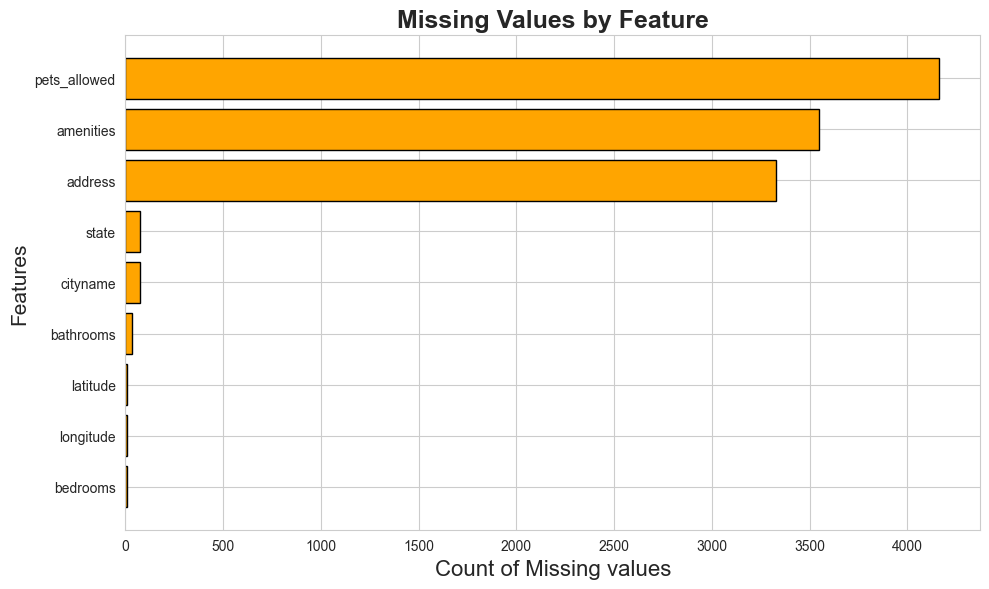

In [137]:
# Visualizing missing values in Bar Chart
plt.figure(figsize=(10, 6))

if len(missing_df[missing_df['Missing_Count'] > 0]) > 0:
    # If there are missing values, bar chart is be shown
    plt.barh(missing_df[missing_df['Missing_Count'] > 0]['Column'], 
             missing_df[missing_df['Missing_Count'] > 0]['Missing_Count'], 
             color='orange', edgecolor='black')
    plt.xlabel('Count of Missing values', fontsize=16)
    plt.ylabel('Features', fontsize=15)
    plt.title('Missing Values by Feature', fontsize=18, fontweight='bold')
    plt.grid(True, axis='x')
    plt.gca().invert_yaxis()  # highest on top
else:
    # If no missing values, show message
    plt.text(0.5, 0.5, 'No missing values detected', 
             ha='center', va='center', fontsize=18, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightgreen'))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [150]:
# Created a copy of dataset
df_clean = df.copy()

# Handling missing values
print("Handling Missing Values:")

# For bathrooms feature, filling missing values with median
if df_clean['bathrooms'].isnull().sum() > 0:
    bathrooms_median = df_clean['bathrooms'].median()
    df_clean['bathrooms'].fillna(bathrooms_median, inplace=True)
    print(f"Bathrooms: Filled {df['bathrooms'].isnull().sum()} missing values with median ({bathrooms_median})")

# For bedrooms, filling missing values with median
if df_clean['bedrooms'].isnull().sum() > 0:
    bedrooms_median = df_clean['bedrooms'].median()
    df_clean['bedrooms'].fillna(bedrooms_median, inplace=True)
    print(f"Bedrooms: Filled {df['bedrooms'].isnull().sum()} missing values with median ({bedrooms_median})")

# For square_feet feature, fill with median
if df_clean['square_feet'].isnull().sum() > 0:
    sqft_median = df_clean['square_feet'].median()
    df_clean['square_feet'].fillna(sqft_median, inplace=True)
    print(f"Square Feet: Filled {df['square_feet'].isnull().sum()} missing values with median ({sqft_median})")

# For latitude/longitude, drop rows with missing values (as they are crucial for location)
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['latitude', 'longitude'])
dropped_rows = initial_rows - len(df_clean)
if dropped_rows > 0:
    print(f"Latitude/Longitude: Dropped {dropped_rows} rows with missing location data")

# For categorical features, filling missing values with 'Unknown'
for col in ['state', 'cityname']:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"{col}: Filled {df[col].isnull().sum()} missing values with 'Unknown'")

# For pets_allowed feature, fill with 'None' (most common)
if df_clean['pets_allowed'].isnull().sum() > 0:
    df_clean['pets_allowed'].fillna('None', inplace=True)
    print(f"Pets Allowed: Filled {df['pets_allowed'].isnull().sum()} missing values with 'None'")

# Final check for any remaining missing values in features we plan to use
# We fill any remaining numerical NaNs with 0 or median to be safe
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

Handling Missing Values:
Bathrooms: Filled 34 missing values with median (1.0)
Bedrooms: Filled 7 missing values with median (2.0)
Latitude/Longitude: Dropped 10 rows with missing location data
state: Filled 77 missing values with 'Unknown'
cityname: Filled 77 missing values with 'Unknown'
Pets Allowed: Filled 4163 missing values with 'None'


### Feaute Engineering

In [151]:
print("Feature Engineering:")

# Creating price per square foot feature
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['square_feet']
print("Created feature: price_per_sqft")

# Create total rooms feature
df_clean['total_rooms'] = df_clean['bathrooms'] + df_clean['bedrooms']
print("Created feature: total_rooms")

# Create binary feature for pet-friendly apartments
df_clean['pets_friendly'] = df_clean['pets_allowed'].apply(lambda x: 1 if x not in ['None', 'null'] else 0)
print("Created feature: pets_friendly")

# Create binary feature for has_photo
df_clean['has_photo_binary'] = df_clean['has_photo'].apply(lambda x: 1 if x == 'Thumbnail' else 0)
print("Created feature: has_photo_binary")

print(f"\nTotal features after engineering: {df_clean.shape[1]}")

Feature Engineering:
Created feature: price_per_sqft
Created feature: total_rooms
Created feature: pets_friendly
Created feature: has_photo_binary

Total features after engineering: 26


In [156]:
# Selecting features for modeling
# We exclude 'price_per_sqft' as it contains the target variable 'price' (Data Leakage)
feature_columns = [
    'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude',
    'total_rooms', 'pets_friendly', 'has_photo_binary'
]

# Target variable
target_column = 'price'

# Creating feature matrix X and target vector y
X = df_clean[feature_columns].copy()
y = df_clean[target_column].copy()

print(f"Feature Matrix Shape: {X.shape}")
print(f"\nFeatures selected for modeling:")
for i, feature in enumerate(feature_columns, 1):
    print(f"  {i}. {feature}")

Feature Matrix Shape: (9990, 8)

Features selected for modeling:
  1. square_feet
  2. bathrooms
  3. bedrooms
  4. latitude
  5. longitude
  6. total_rooms
  7. pets_friendly
  8. has_photo_binary


### Feature scaling

In [158]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print("Feature Scaling:")

print(f"Scaled Feature Matrix Shape: {X_scaled.shape}")
print("\nScaling Statistics (Mean and Std for each feature):")
for i, col in enumerate(feature_columns):
    print(f"  {col:20s} - Mean: {scaler.mean_[i]:10.4f}, - Std: {scaler.scale_[i]:10.4f}")

Feature Scaling:
Scaled Feature Matrix Shape: (9990, 8)

Scaling Statistics (Mean and Std for each feature):
  square_feet          - Mean:   946.1663, - Std:   655.8006
  bathrooms            - Mean:     1.3795, - Std:     0.6148
  bedrooms             - Mean:     1.7447, - Std:     0.9422
  latitude             - Mean:    37.6952, - Std:     5.4956
  longitude            - Mean:   -94.6522, - Std:    15.7590
  total_rooms          - Mean:     3.1242, - Std:     1.4431
  pets_friendly        - Mean:     0.5840, - Std:     0.4929
  has_photo_binary     - Mean:     0.8906, - Std:     0.3122


### Train Test split

In [160]:
# importing train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train-Test Split:")
print(f"Training Set Size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Testing Set Size:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"\nTraining Features Shape: {X_train.shape}")
print(f"Testing Features Shape:  {X_test.shape}")

Train-Test Split:
Training Set Size: 7992 samples (80.0%)
Testing Set Size:  1998 samples (20.0%)

Training Features Shape: (7992, 8)
Testing Features Shape:  (1998, 8)


### Task 4: Model Training

In [169]:
# Importing libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time


# 1st Model: Linear regression model training
print("Training Linear Regression Model:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f"Model is trained with the number of features: {lr_model.n_features_in_}")

# 2nd Model: Random forest regressor model training with initial parameters
# Train Random Forest Regressor with initial parameters
print("Training Random Forest Regressor:")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

print(f"Number of trees: {rf_model.n_estimators}")
print(f"Max depth: {rf_model.max_depth}")
print(f"Number of features: {rf_model.n_features_in_}")

Training Linear Regression Model:
Model is trained with the number of features: 8
Training Random Forest Regressor:
Number of trees: 100
Max depth: 20
Number of features: 8
Number of trees: 100
Max depth: 20
Number of features: 8
